<a href="https://colab.research.google.com/github/Jnyambok/Machine-Learning-with-Python-Cookbook-Notebook/blob/main/Machine_Learning_with_Python_Cook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning with Python Cookbook**

In [ ]:
!pip install --upgrade pip
!pip install dask[dataframe]
!pip install faiss-cpu
!pip install LightningModule
!pip install lightning
!pip install torchviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 53.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement LightningModule (from versions: none)
ERROR: No matching distribution found for LightningModule
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 33.4 MB/s eta 0:00:00


In [ ]:
!pip install flask

# **Chapter 1: Matrices, Arrays and Vectors**

### 1.1 Creating a matrix

In [ ]:
#Creating a matrix
import numpy as np
matrix = np.mat([[1,2,3],
                [4,5,6],
                [7,8,9]])
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
#Creating a sparse matrix
import numpy as np
from scipy import sparse
matrix = np.mat([[1,2,3],
                [4,5,6],
                [7,8,9]])
sparse_matrix = sparse.csr_matrix(matrix)
print(sparse_matrix)
#

  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (1, 0)	4
  (1, 1)	5
  (1, 2)	6
  (2, 0)	7
  (2, 1)	8
  (2, 2)	9


###  1.2 Preallocating NumPy Arrays

In [ ]:
#Creating a 1,5 vector
vector = np.zeros(shape = 5)
print(vector)

[0. 0. 0. 0. 0.]


In [ ]:
#Generate a matrix of shape (3,3) containing all ones
generated_matrix = np.full (shape =(2,3), fill_value = 3)
print(generated_matrix)

[[3 3 3]
 [3 3 3]]


### 1.3 Describing a matrix

In [ ]:
matrix = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
result_matrix = [matrix.shape, matrix.size, matrix.ndim]
print(result_matrix)

[(3, 3), 9, 2]


###  1.4 Reshaping a matrix

In [ ]:
#Adding the reshape (1,-1) - The "-1" means as many as is needed
matrix = np.array([[1, 2, 3],
[4, 5, 6],
[7, 8, 9],
[10, 11, 12]])
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
matrix.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

###  1.5 Flattening a matrix using Ravel

In [ ]:
matrix = np.array([[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])
matrix.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

###   1.6 Generating Random Values

In [ ]:
np.random.seed(1)

In [ ]:
np.random.random(3)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

## **Chapter 2: Loading New Data**

###  1.Loading a JSON File


In [ ]:
# Load library
import pandas as pd
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'

In [ ]:
data = pd.read_json(url,orient="columns")
data.head(4)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0


###  2.Querying an SQL Database


In [ ]:
!pip install SQLAlchemy
!pip install pysqlite3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysqlite3: filename=pysqlite3-0.5.4-cp310-cp310-linux_x86_64.whl size=151319 sha256=cb00e521f51980dcb87246ad29a095ebdcc6340111314611f418c85c000e0d3c
  Stored in directory: /root/.cache/pip/wheels/04/55/74/e3b53aeb9ff9e933626ee3938ccad69123828115ae34ce028e
Successfully built pysqlite3


In [ ]:
from sqlalchemy import create_engine

In [ ]:
import sqlite3

# Connect to the database (creates a new one if it doesn't exist)
conn = sqlite3.connect('my_database.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Create a table (if it doesn't exist)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        age INTEGER
    )
''')

# Insert some data
cursor.execute('''
    INSERT INTO users (name, age) VALUES ('Alice', 30), ('Bob', 25), ('Charlie', 35)
''')

# Fetch all rows from the table
cursor.execute('SELECT * FROM users')
rows = cursor.fetchall()

# Print the results
for row in rows:
    print(row)

# Commit the changes and close the connection
conn.commit()
conn.close()

(1, 'Alice', 30)
(2, 'Bob', 25)
(3, 'Charlie', 35)


###  3.Connecting to google sheets

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1n1lnCrNW1ZBFO9XPYanuquAl7VmsOrRK6BnWE9v74qk/edit?gid=846111261#gid=846111261"

In [ ]:


from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#Replace with your actual spreadsheet URL
url = "https://docs.google.com/spreadsheets/d/1n1lnCrNW1ZBFO9XPYanuquAl7VmsOrRK6BnWE9v74qk/edit?gid=846111261#gid=846111261"

#Extract the spreadsheet key from the URL
spreadsheet_key = url.split('/d/')[1].split('/')[0]

#Open the spreadsheet by key
sh = gc.open_by_key(spreadsheet_key)

#Get the first worksheet
worksheet = sh.worksheet("MASTER DATA")

#Example: read data from the sheet
data = worksheet.get_all_values()
data = pd.DataFrame(data, columns=data.pop(0))
data.head(2)




,Date (dd/mm/yy),Month,Name of expense,Type of expense,Amount Spent in ksh,Comments,Year,Day,,,
0,21/6/2022,June,Lotion,Accessories,195,,2022,Tuesday,,,
1,21/6/2022,June,Smokies,Thrills,30,,2022,Tuesday,,,


# **Chapter 3: Data Wrangling**

###  1.Selecting rows based on conditionals

In [ ]:
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/titanic.csv'

data = pd.read_csv(url)
data.head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [ ]:
#show top 2 rows where guys are males
data[data['Sex']=="male"].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [ ]:
#top 2 rows where guys are make and they survived
data[(data['Sex'] == "male") & (data['Survived'] == 1)]. head(2)

,Name,PClass,Age,Sex,Survived,SexCode
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,"Anderson, Mr Harry",1st,47.00,male,1,0


###  2.Sorting Values

In [ ]:
#Sort the men who survived by listing the top 2
data[(data['Sex'] == "male") & (data['Survived'] == 1)].sort_values(by=['Age'],ascending=False).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
110,"Frolicher-Stehli, Mr Maxmillian",1st,60.0,male,1,0
231,"Simonius-Blumer, Col Alfons",1st,56.0,male,1,0


###  3.Replacing values and renaming columns


In [ ]:
#Change the top 2 male survivors to 2nd Passenger classes
top_2 = data[(data['Sex'] == "male") & (data['Survived'] == 1)].sort_values(by=['Age'],ascending=False).head(2)

#Replace the P class
top_2 ['PClass'].replace("1st","2nd")

,PClass
110,2nd
231,2nd


In [ ]:
#Renaming columns to read Passenger Class
top_2.rename(columns={'PClass':"Passenger Class"})

,Name,Passenger Class,Age,Sex,Survived,SexCode
110,"Frolicher-Stehli, Mr Maxmillian",1st,60.0,male,1,0
231,"Simonius-Blumer, Col Alfons",1st,56.0,male,1,0


### 4.Grouping Rows by Values

In [ ]:
# Group rows, calculate mean
data.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           24.901408
        1           30.867143
male    0           32.320780
        1           25.951875
Name: Age, dtype: float64

In [ ]:
# Group rows, apply function to groups
data.groupby('Sex').apply(lambda x: x.count())

<ipython-input-47-1c8c2d26b226>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('Sex').apply(lambda x: x.count())


,Name,PClass,Age,Sex,Survived,SexCode
Sex,,,,,,
female,462,462,288,462,462,462
male,851,851,468,851,851,851


# **Chapter 4: Handling Numerical Values**

### 1.Rescaling a feature

Rescaling features to fit a certain scale
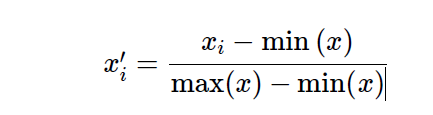

In [ ]:
import numpy as np
from sklearn import preprocessing


#create a feature
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

#Create scaler
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

#Scale feature
scaled_feature = minmax_scaler.fit_transform(feature)

#Show feature
scaled_feature


array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

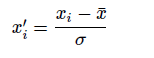


In [ ]:
#Using standardization
#Create standard scaler
scaler = preprocessing.StandardScaler()

#Transform the feature
standardized = scaler.fit_transform(feature)

standardized


array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

If our data has significant outliers, it can negatively impact our standardization by affecting the
feature’s mean and variance. In this scenario, it is often helpful to instead rescale the feature
xi − ¯x
σ
using the median and quartile range. In scikit-learn, we do this using the RobustScaler
method:

In [ ]:
#Using robust scaler
robust_scaler = preprocessing.RobustScaler()

#Transform feature
robusted = robust_scaler.fit_transform(feature)

robusted


array([[-2.5],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 4.5]])

Many rescaling methods (e.g., min-max scaling and standardization) operate on features;
however, we can also rescale across individual observations. Normalizer rescales the values
on individual observations to have unit norm (the sum of their lengths is 1). This type of
rescaling is often used when we have many equivalent features (e.g., text classification when
every word or n-word group is a feature).

In [ ]:
from sklearn.preprocessing import Normalizer

#Transform feature matrix
features_l2_norm = Normalizer(norm="l2").transform(feature)

#Show feature matrix
features_l2_norm

array([[-1.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 1.]])

In [ ]:
#Transform feature matrix
features_l1_norm = Normalizer(norm="l1").transform(feature)

#Show feature matrix
features_l1_norm

array([[-1.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 1.]])

### 2.Detecting outliers


In [ ]:
# Create simulated data
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples = 10,
n_features = 2,
centers = 1,
random_state = 1)

In [ ]:
#Create a feature from the features
feature = features[:,0]
feature

array([-1.83198811, -2.76017908, -1.61734616, -0.52579046,  0.08525186,
       -0.79415228, -1.34052081, -1.98197711, -2.18773166, -0.19745197])

In [ ]:
#Create function for detecting outliers
import pandas as pd
import numpy as np

def indices_of_outliers(x):
    q1, q3 = np.percentile(x,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

In [ ]:
indices_of_outliers(feature)

(array([], dtype=int64),)

### 3.Handling Outliers


In [ ]:
#Creating a column to specifcally outline outliers
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]
houses.head(3)

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [ ]:
houses['Outlier'] = np.where(houses['Bathrooms'] < 20,0,1)
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [ ]:
#We can transform them to dampen the effect
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]
houses


,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


### 4.Imputing Missing Values

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [ ]:
#Make a simulated feature matrix
features, _ = make_blobs(n_samples = 1000,
                         n_features = 2,
                         random_state=1)

#Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

#Replace the first feature with missing values
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

#Predict the missing values in the feature matrix
knn_imputer   = KNNImputer(n_neighbors=5)
features_knn_imputed = knn_imputer.fit_transform(standardized_features)

#Compare true and imputed values
print("True Value:", true_value)
print("Imputed Value:", features_knn_imputed[0,0])

True Value: 0.8730186113995938
Imputed Value: 1.0959262913919632


# **Chapter 5: Handling Categorical Data**

### 5.1 Encoding Nominal Categorical Features

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [ ]:
#Create features
feature = np.array([["Texas"],
                   ["Nairobi"],
                   ["California"]])
#Instantiate the encoder
one_hot = LabelBinarizer()

#Onehot encode
one_hot.fit_transform(feature)


array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
#check the features
one_hot.classes_

array(['California', 'Nairobi', 'Texas'], dtype='<U10')

In [ ]:
# Multiclass binarizer
multiclass_feature = [("Texas", "Florida"),
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Alabama")]

#Create multiclass one hot encoder
one_hot_multiclass = MultiLabelBinarizer()

#Onehot encode
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

### 5.2 Encoding Ordinal Categorical Features (and filling the missing call)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45],
[1, 1.18, 1.33],
[0, 1.22, 1.27],
[1, -0.21, -1.19]])


#Train knn Learner
clf = KNeighborsClassifier(3, weights = 'distance')
# Reshape the feature array to 2D using reshape(-1, 1)
trained_model = clf.fit(X[:,1].reshape(-1,1),X[:,0])

#the second column (X[:,1]) as features
#and the first column (X[:,0]) as the target variable


# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31],
[np.nan, -0.67, -0.22]])

#predict class of missing values
# Use only the second column (index 1) for prediction
imputed_values = trained_model.predict(X_with_nan[:,1].reshape(-1,1))
#X_with_nan[:,1:]: This part extracts all rows from the X_with_nan dataset
#but only the columns starting from the second column (index 1)

# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))
# Join two feature matrices
np.vstack((X_with_imputed, X))

array([[ 1.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

# **Chapter 6: Handling Categorical Data**

##1.Cleaning Text


Most basic text cleaning operations should only replace Python’s core string
operations, in particular strip, replace, and split

In [ ]:
# Create text
text_data = [" Interrobang. By Aishwarya Henriette ",
"Parking And Going. By Karl Gautier",
" Today Is The night. By Jarek Prakash "]

#stripping whitespaces
stripped_text = [string.strip() for string in text_data]
stripped_text

#removing period
removed_text = [string.replace(".","") for string in stripped_text]
removed_text

['Interrobang By Aishwarya Henriette',
 'Parking And Going By Karl Gautier',
 'Today Is The night By Jarek Prakash']

In [ ]:
#Create and apply a custom transformation function
#create function
def capitalizer (string:str) -> str:
  return string.upper()

#apply function
[capitalizer(string) for string in removed_text]

['INTERROBANG BY AISHWARYA HENRIETTE',
 'PARKING AND GOING BY KARL GAUTIER',
 'TODAY IS THE NIGHT BY JAREK PRAKASH']

We can use regular expressions to make powerful string operations


In [ ]:
import re

#create function
def replace_letters_with_X(string:str) -> str:
  return re.sub(r"[a-zA-Z]","X",string)

#apply function
[replace_letters_with_X(string) for string in removed_text]
#

['XXXXXXXXXXX XX XXXXXXXXX XXXXXXXXX',
 'XXXXXXX XXX XXXXX XX XXXX XXXXXXX',
 'XXXXX XX XXX XXXXX XX XXXXX XXXXXXX']

## 2.Removing Punctuation

In [ ]:
import unicodedata, sys

In [ ]:
#Create text
text_data = [" I've been thinking of using my glock!Wtf!Kumbaya.....Like!? #Like"]

#Create a dictionary of punctuation characters
punc = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))

#For each string, remove any punctuation
[string.translate(punc) for string in text_data]


[' Ive been thinking of using my glockWtfKumbayaLike Like']

##3.Tokenizing Text

In [ ]:
!pip install nltk


In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#load library
import nltk
from nltk.tokenize import word_tokenize


string = "The science of today is the technology of tomorrow"
word_tokenize(string)

['The', 'science', 'of', 'today', 'is', 'the', 'technology', 'of', 'tomorrow']

## 4.Removing Stop Words


In [ ]:
from nltk.corpus import stopwords
# Create word tokens
tokenized_words = ['i',
'am',
'going',
'to',
'go',
'to',
'the',
'store',
'and',
'park']

#Load stopwords
stop_words = stopwords.words('english')

#Remove stop words
[word for word in tokenized_words if word not in stop_words]
#




['going', 'go', 'store', 'park']

##5.Stemming of words

In [ ]:
from nltk.stem.porter import PorterStemmer

# Create word tokens
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'traditional', 'meeting']

#Create stemmer object
porter = PorterStemmer()

#Apply stemmer
[porter.stem(word) for word in tokenized_words]
#


['i', 'am', 'humbl', 'by', 'thi', 'tradit', 'meet']

## 6.POS tagging

In [ ]:
#load libraries
from nltk import pos_tag,word_tokenize

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
text = "I am learning Natural Language Processing. I love it. Free the guys"


In [ ]:
#Use pre-trained pos tagger
text_tagged = pos_tag(word_tokenize(text))
text_tagged

[('I', 'PRP'),
 ('am', 'VBP'),
 ('learning', 'VBG'),
 ('Natural', 'NNP'),
 ('Language', 'NNP'),
 ('Processing', 'NNP'),
 ('.', '.'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Free', 'VB'),
 ('the', 'DT'),
 ('guys', 'NNS')]

A more realistic situation would be that we have data where every observation
contains a tweet and we want to convert those sentences into features for
individual parts of speech (e.g., a feature with 1 if a proper noun is present, and 0
otherwise):

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create text
tweets = ["I am eating a burrito for breakfast",
"Political science is an amazing field",
"San Francisco is an awesome city"]

#tagged tweets
tagged_tweets = []

#Tag each word and each tweet
for tweet in tweets:
  tweet_tag = pos_tag(word_tokenize(tweet))
  tagged_tweets.append([tag for word, tag in tweet_tag])

#Use one hot encoding
one_hot_multi = MultiLabelBinarizer()
one_hot_multi.fit_transform(tagged_tweets)

array([[1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1]])

In [ ]:
one_hot_multi.classes_

array(['DT', 'IN', 'JJ', 'NN', 'NNP', 'PRP', 'VBG', 'VBP', 'VBZ'],
      dtype=object)

## 7.Bag of Words

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#Create text
text_data = np.array(['I love Brazil. Brazil!',
'Sweden is best',
'Germany beats both'])

#Create the bag of words feature matrix
count = CountVectorizer()
bag = count.fit_transform(text_data)

bag.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]])

## 8.Weighting word importance

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Create text
text_data = np.array(['I love Brazil. Brazil!',
'Sweden is best',
'Germany beats both'])

# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)

# Show tf-idf feature matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [ ]:
tfidf.vocabulary_

{'love': 6,
 'brazil': 3,
 'sweden': 7,
 'is': 5,
 'best': 1,
 'germany': 4,
 'beats': 0,
 'both': 2}

# **Chapter 7: Handling Dates and Times**

## 1.Lagging Time feature and rolling averages


In [ ]:
import pandas as pd
#load a library

In [ ]:
dataframe = pd.DataFrame()
dataframe['dates']  = pd.date_range("1/1/2001",periods = 5,freq = "M")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]
dataframe

<ipython-input-8-a5cfe46e8402>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataframe['dates']  = pd.date_range("1/1/2001",periods = 5,freq = "M")


,dates,stock_price
0,2001-01-31,1.1
1,2001-02-28,2.2
2,2001-03-31,3.3
3,2001-04-30,4.4
4,2001-05-31,5.5


In [ ]:
#previous lagged by one row
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(2)
dataframe

,dates,stock_price,previous_days_stock_price
0,2001-01-31,1.1,NaN
1,2001-02-28,2.2,NaN
2,2001-03-31,3.3,1.1
3,2001-04-30,4.4,2.2
4,2001-05-31,5.5,3.3


In [ ]:
#Rolling averages
dataframe['rolling_averages'] = dataframe['stock_price'].rolling(window = 2).mean()
dataframe

,dates,stock_price,previous_days_stock_price,rolling_averages
0,2001-01-31,1.1,NaN,NaN
1,2001-02-28,2.2,NaN,1.65
2,2001-03-31,3.3,1.1,2.75
3,2001-04-30,4.4,2.2,3.85
4,2001-05-31,5.5,3.3,4.95


# **Chapter 8: Handling Images**

## 1. Loading Images

In [ ]:
#Load libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Load image as grayscale
image = cv2.imread("images/dog.jpg",cv2.IMREAD_GRAYSCALE)
copy_image = image.copy()
#image = np.array(image,dtype=np.float32)


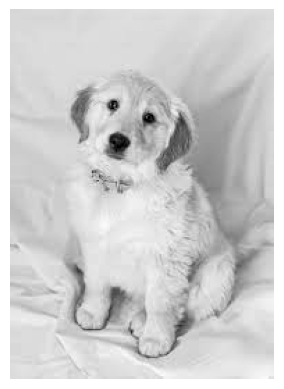

In [ ]:
plt.imshow(image,cmap="gray")
plt.axis("off")
plt.show()

array([[192, 192, 192, ..., 198, 198, 198],
       [192, 192, 192, ..., 198, 198, 198],
       [193, 193, 193, ..., 197, 197, 197],
       ...,
       [196, 196, 196, ..., 217, 217, 216],
       [197, 197, 197, ..., 199, 206, 199],
       [197, 197, 197, ..., 199, 205, 199]], dtype=uint8)
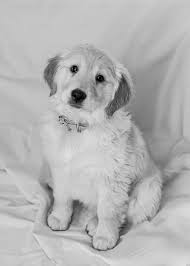

In [ ]:
#Displaying the array
image

In [ ]:
image [0,2]

192

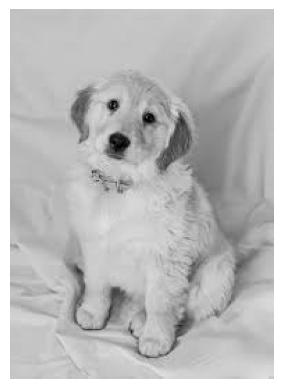

In [ ]:
#Convert to RGB
image_rgb = cv2.cvtColor(copy_image,cv2.COLOR_GRAY2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

## 2. Blurring and Sharpening Images

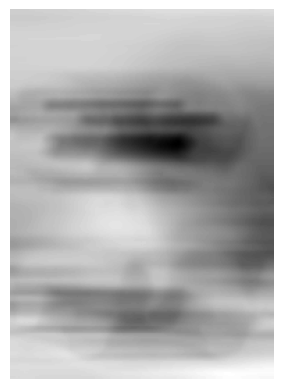

In [ ]:
#blur imgs
image_blur = cv2.blur(copy_image,(100,5))
plt.imshow(image_blur,cmap="gray")
plt.axis("off")
plt.show()

Sharpening works similarly to blurring, except instead of using a kernel to average the
neighboring values, we constructed a kernel to highlight the pixel itself. The resulting effect
makes contrasts in edges stand out more.

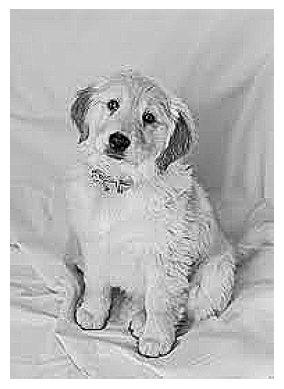

In [ ]:
#sharpening images
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

## 3. Enhancing Contrast

Histogram equalization is a tool for image processing that can make objects and shapes stand
out. When we have a grayscale image, we can apply OpenCV’s equalizeHist directly on the
image:

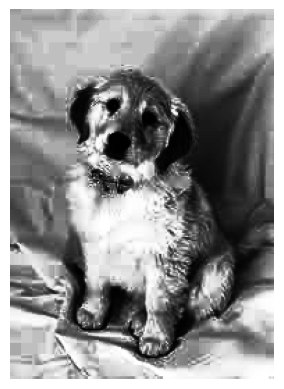

In [ ]:
image_contrast = cv2.equalizeHist(copy_image)
plt.imshow(image_contrast, cmap="gray"), plt.axis("off")
plt.show()

However, when we have a color image, we first need to convert the image to the YUV color
format. The Y is the luma, or brightness, and U and V denote the color. After the conversion, we
can apply equalizeHist to the image and then convert it back to BGR or RGB (apologies to
hardcopy readers for whom there are no color images):

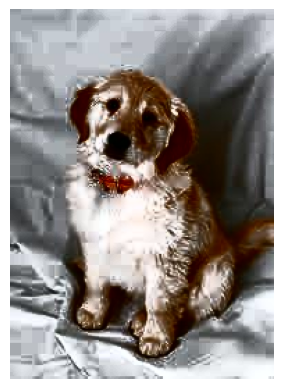

In [ ]:
image_bgr = cv2.imread("images/dog.jpg")
# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

## 4. Creating Features for Machine Learning

In [ ]:
#Converting the multidimensional array containing image data into a vector
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#load image as greyscale
image = cv2.imread("images/dog.jpg",cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Resize image to 10 pixels by 10 pixels
    image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()


array([194, 195, 197, 197, 197, 196, 194, 198, 191, 195, 193, 196, 196,
       197, 199, 188, 186, 184, 187, 184, 188, 189, 112, 190, 186, 164,
       174, 163, 153, 174, 192, 193, 189, 202, 112, 161,  80, 137, 166,
       182, 184, 182, 198, 141, 190, 182, 177, 122, 154, 167, 175, 183,
       200, 209, 213, 193, 190, 170, 154, 164, 204, 176, 163, 207, 207,
       203, 188, 162, 140, 150, 172, 203, 156, 190, 197, 200, 186, 200,
       121, 187, 206, 200, 122, 145, 182, 200,  77, 188, 190, 197, 197,
       195, 210, 200, 206, 174, 189, 201, 205, 201], dtype=uint8)

In [ ]:
#black and white images are rep'd by singular value columns
print( image.shape,image_10x10.shape)

(266, 190) (10, 10)


In [ ]:
#if we flatten the array, we get 100 which is the vector length
image_10x10.flatten().shape

(100,)

In [ ]:
#lets load it in color
image_color = cv2.imread("images/dog.jpg",cv2.IMREAD_COLOR)

# Convert image data to one-dimensional vector
image_color10x10 = cv2.resize(image_color, (10, 10))

#convert to 1D vector
image_color10x10.flatten().shape


(300,)

## 5. Encoding Color Histograms as Features

In [ ]:
np.random.seed(0)

#load image
image_bgr = cv2.imread("images/dog.jpg",cv2.IMREAD_COLOR)

#Convert to RGB
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

# Create a list of feature values
features = []

#Calculate the histogram for each color channel
colors = ("red","green","blue")
for i,channel in enumerate(colors):
  hist = cv2.calcHist([image_rgb],[i],None,[32],[0,256])
  features.extend(hist)

# Create a vector for an observations feature values
observation = np.array(features).flatten()

observation[0:5]

array([22., 22., 32., 33., 25.], dtype=float32)

In the RGB color model, each color is the combination of three color channels (i.e., red, green,
blue). In turn, each channel can take on one of 256 values (represented by an integer between 0
and 255). For example, the top leftmost pixel in our image has the following channel values:

In [ ]:
image_rgb[0,0]

array([186, 193, 201], dtype=uint8)

In this example, we have some data with two 1s, two 2s, three 3s, one 4, and one 5. In the
histogram, each bar represents the number of times each value (1, 2, etc.) appears in our data.
We can apply this same technique to each of the color channels, but instead of five possible
values, we have 256 (the number of possible values for a channel value). The x-axis represents
the 256 possible channel values, and the y-axis represents the number of times a particular
channel value appears across

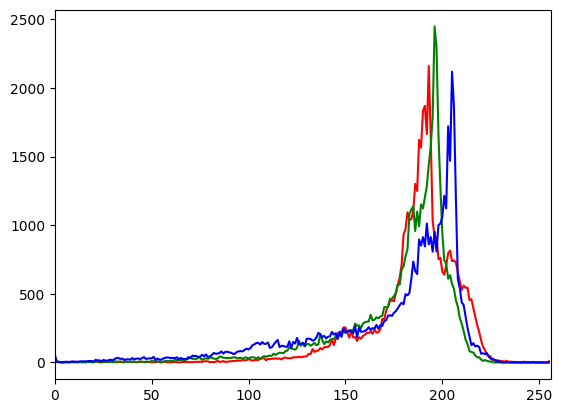

In [ ]:
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
  histogram = cv2.calcHist([image_rgb], # Image
  [i], # Index of channel
  None, # No mask
  [256], # Histogram size
  [0,256]) # Range
  plt.plot(histogram, color = channel)
  plt.xlim([0,256])
# Show plot
plt.show()

## 6. Using Pretrained Embeddings as Features

In [ ]:
#Loading pretrained embeddings from an existing model in Pytorch and
#use them as input
# Load libraries
import cv2
import numpy as np
import torch
from torchvision import transforms
import torchvision.models as models

#loading the image
image = cv2.imread("images/dog.jpg",cv2.IMREAD_COLOR)

#Convert to pytorch data type
convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image))

#Load the pretrained model
model = models.resnet18(pretrained=True)

#Select the specific layer of the model we want output from
layer = model._modules.get('avgpool')

#Set model to evaluation mode
model.eval()

#Infer the embedding with the no_grad option
with torch.no_grad():
  embedding = torch.zeros(1,512,1,1)
  embedding = layer(pytorch_image.unsqueeze(0))


print(embedding.shape)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 149MB/s]


torch.Size([1, 3, 1, 1])


## 7. Classifying Images with Pytorch



Use torchvision.models to select a pretrained image classification model and feed the
image through it:

In [ ]:
import cv2
import json
import numpy as np
import torch
from torchvision import transforms
from torchvision.models import resnet18
import urllib.request

In [ ]:
import cv2
import json
import numpy as np
import torch
from torchvision import transforms
from torchvision.models import resnet18
import urllib.request

# Get imagenet classes
# Correct the URL to point to the specific file (imagenet_class_index.json)
url = "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"
try:
    with urllib.request.urlopen(url) as response: # Use 'response' to store the file-like object
        imagenet_json = json.load(response)  # Load JSON data from 'response'
except urllib.error.HTTPError as e:
    print(f"HTTP Error: {e.code} - {e.reason}")
except urllib.error.URLError as e:
    print(f"URL Error: {e.reason}")
except json.JSONDecodeError as e:
    print(f"JSON Decode Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
#instantiate pretrained model
model = resnet18(pretrained=True)


In [ ]:
#Load image
image_bgr = cv2.imread("images/dog.jpg",cv2.IMREAD_COLOR)

#Convert to RGB
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)


In [ ]:
#Convert to pytorch data type
convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image_rgb))

In [ ]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#Make a prediction
prediction = model (pytorch_image.unsqueeze(0))

In [ ]:
#Get the index of the highest predicted probability
_ , index = torch.max(prediction,1)

In [ ]:
#Convert to a percetage value
percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100

In [ ]:
# Print the name of the item at the index along with the percent confidence
print(imagenet_json[str(index.tolist()[0])][1],
percentage[index.tolist()[0]].item())

Great_Pyrenees 30.16456413269043


# **Chapter 9. Dimensionality Reduction Using Feature Extraction**

## 1. Reducing dimensionality using PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [ ]:
#Load the data
wine = datasets.load_wine()

#Standardize the feature matrix
features = StandardScaler().fit_transform(wine.data)

#Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99,whiten=True)

#Fit the PCA and transform the data
features_pca = pca.fit_transform(features)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])


Original number of features: 13
Reduced number of features: 12


## 2.Reducing Features when data is linearly inseparable

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_circles

In [ ]:
#Create linearly inseparable data
features,_ = make_circles(n_samples=1000,random_state=1,noise=0.1,factor=0.1)

#Apply Kernel PCA with radius basis function kernel
kpca = KernelPCA(kernel="rbf",gamma=15,n_components=1)
features_kpca = kpca.fit_transform(features)



In [ ]:
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])


Original number of features: 2
Reduced number of features: 1


## 3. Reducing Features by Maximizing Class Separability

In [ ]:
#Create and run LDA

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load Iris flower dataset:
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create and run an LDA, then use it to transform the features
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
# Print the number of features
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


##4. Reducing Features Using Matrix Factorization


In [ ]:
# Load libraries
from sklearn.decomposition import NMF
from sklearn import datasets
# Load the data
digits = datasets.load_digits()
# Load feature matrix
features = digits.data
# Create, fit, and apply NMF
nmf = NMF(n_components=10, random_state=4)
features_nmf = nmf.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])

Original number of features: 64
Reduced number of features: 10


# **Chapter 10. Dimensionality Reduction Using Feature Selection**

##1. Thresholding Numerical Feature Variance

In [ ]:
#load libraries
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

In [ ]:
breast = datasets.load_breast_cancer()
features = breast.data
target = breast.target

In [ ]:
#Create thresholder
thresholder = VarianceThreshold (threshold=.5)

#features with high variance
features_high_variance = thresholder.fit_transform(features)

#View high feature variance matrix
features_high_variance[0:3]

array([[  17.99 ,   10.38 ,  122.8  , 1001.   ,    8.589,  153.4  ,
          25.38 ,   17.33 ,  184.6  , 2019.   ],
       [  20.57 ,   17.77 ,  132.9  , 1326.   ,    3.398,   74.08 ,
          24.99 ,   23.41 ,  158.8  , 1956.   ],
       [  19.69 ,   21.25 ,  130.   , 1203.   ,    4.585,   94.03 ,
          23.57 ,   25.53 ,  152.5  , 1709.   ]])

In [ ]:
#If you scale it will not work properly
from sklearn.preprocessing import StandardScaler

#Standardize feature matrix
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [ ]:
#Calculate variance
selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#For categorical features
# Create feature matrix with:
# Feature 0: 80% class 0
# Feature 1: 80% class 1
# Feature 2: 60% class 0, 40% class 1
features = [[0, 1, 0],
[0, 1, 1],
[0, 1, 0],
[0, 1, 1],
[1, 0, 0]]

In [ ]:
# Run threshold by variance
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

## 2. Handling Highly Correlated Features

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
# Create feature matrix with two highly correlated features
features = np.array([[1, 1, 1],
[2, 2, 0],
[3, 3, 1],
[4, 4, 0],
[5, 5, 1],
[6, 6, 0],
[7, 7, 1],
[8, 7, 0],
[9, 7, 1]])

In [ ]:
df = pd.DataFrame(features)

#Create correlation matrix
corr_matrix = df.corr().abs()

#Select the upper triangele of correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                  k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
df.drop(df.columns[to_drop], axis=1).head(3)

,0,2
0,1,1
1,2,0
2,3,1


## 3. Recursively Eliminating Features

In [ ]:
# Load libraries
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy",
message="^internal gelsd")

In [ ]:
# Generate features matrix, target vector, and the true coefficients
features, target = make_regression(n_samples = 10000,
n_features = 100,
n_informative = 2,
random_state = 1)

In [ ]:
# Create a linear regression
ols = linear_model.LinearRegression()

In [ ]:
# Recursively eliminate features
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 ],
       [-1.07500204,  2.56148527],
       [ 1.37940721, -1.77039484],
       ...,
       [-0.80331656, -1.60648007],
       [ 0.39508844, -1.34564911],
       [-0.55383035,  0.82880112]])

In [ ]:
# Number of best features
rfecv.n_features_

2

# **Chapter 11. Model Evaluation**

## 1. Cross-Validating Models

In [ ]:
#Create a pipeline that preprocesses the data, trains the model, and then evaluates it using crossvalidation
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
#load digits dataset
digits = datasets.load_digits()

#create feature matrix
features = digits.data

#create a target vector
target = digits.target

#Create standardizer
st = StandardScaler()

#Create logistic regression object
Lt = LogisticRegression()

#Create a pipeline that standardizes then runs logistic regression
pipeline = make_pipeline(st,Lt)

In [ ]:
#Create KFolf cross validation
kf = KFold(n_splits = 4 , shuffle = True, random_state=0)

#Conduct kfold cross validation
cv_results = cross_val_score(pipeline,#Pipeline
                             features,#Feature matrix
                             target,#Target vector
                             cv=kf,#Perfomance metric
                             scoring="accuracy",#loss function
                             n_jobs=-1) #use all CPU cores

cv_results

array([0.96666667, 0.9688196 , 0.97772829, 0.97327394])

In [ ]:
cv_results.mean()

0.9716221232368226

In [ ]:
from sklearn.model_selection import StratifiedKFold
#Create KFolf cross validation
sf = StratifiedKFold(n_splits = 4 , shuffle = True, random_state=0)
#Conduct kfold cross validation
cv_ = cross_val_score(pipeline,#Pipeline
                             features,#Feature matrix
                             target,#Target vector
                             cv=sf,#Perfomance metric
                             scoring="accuracy",#loss function
                             n_jobs=-1) #use all CPU cores

cv_

array([0.96888889, 0.95991091, 0.97327394, 0.97327394])

In [ ]:
cv_.mean()

0.9688369215540708

##2. Creating a baseline Regression Model

In [ ]:
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#load data
wine = load_wine()

#create features
features, target = wine.data, wine.target

#make train and test split
features_train, features_test, target_train, target_test = train_test_split(features,target,random_state=0)

#create a dummy regressor
dummy = DummyRegressor(strategy="mean")

#train
dummy.fit(features_train,target_train)

#calculate R^2
dummy.score(features_test,target_test)



-0.0480213580840978

In [ ]:
# Load library
from sklearn.linear_model import LinearRegression
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)
# Get R-squared score
ols.score(features_test, target_test)


0.804353263176954

## 3. Evaluating Binary Classifier Thresholds


In [ ]:
##Use the receiver operating characteristic (ROC) curve to evaluate the quality of the binary
#classifier. In scikit-learn, we can use roc_curve to calculate the true and false positives at
#each threshold, and then plot them:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


In [ ]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
n_features=10,
n_classes=2,
n_informative=3,
random_state=3)

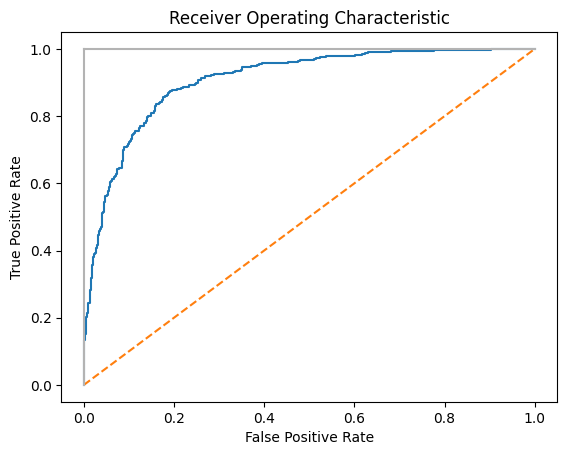

In [ ]:
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Create classifier
logit = LogisticRegression()
# Train model
logit.fit(features_train, target_train)
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(
target_test,
target_probabilities
)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## 4. Evaluating Regression Models

In [ ]:
#Using co effecient of determination
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
n_features = 3,
n_informative = 3,
n_targets = 1,
noise = 50,
coef = False,
random_state = 1)


In [ ]:
ols = LinearRegression()

In [ ]:
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

## 5. Evaluating Clustering Models

Use silhouette coefficients to measure the quality of the clusters (note that this does not measure
predictive performance):

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



In [ ]:
# Generate features matrix
features, _ = make_blobs(n_samples = 1000,
n_features = 10,
centers = 2,
cluster_std = 0.5,
shuffle = True,
random_state = 1)


In [ ]:
# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)
# Get predicted classes
target_predicted = model.labels_
# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072141

## 6. Evaluating the effect of Training Set Size

In [ ]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

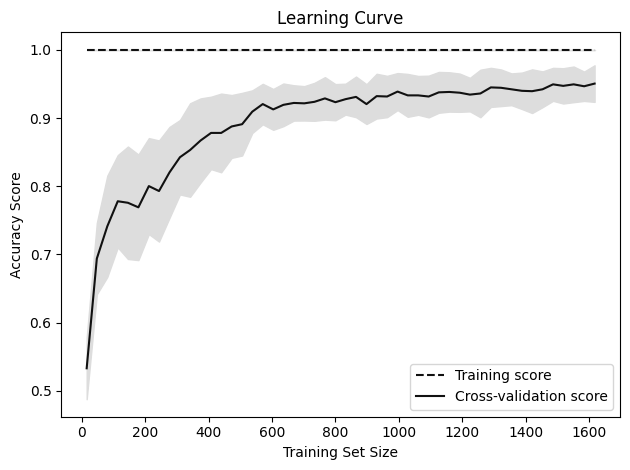

In [ ]:
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
RandomForestClassifier(),
# Feature matrix
features,
# Target vector
target,
# Number of folds
cv=10,
# Performance metric
scoring='accuracy',
# Use all computer cores
n_jobs=-1,
# Sizes of 50
# Training set
train_sizes=np.linspace(
0.01,
1.0,
50))
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 7. Creating a Text Report of Evaluation Metrics

In [ ]:
# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Load data
iris = datasets.load_iris()
# Create features matrix
features = iris.data
# Create target vector
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)
# Create logistic regression
classifier = LogisticRegression()
# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)
# Create a classification report
print(classification_report(target_test,
target_predicted,
target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



##8. Visualizing the Effect of Hyperparameter Values

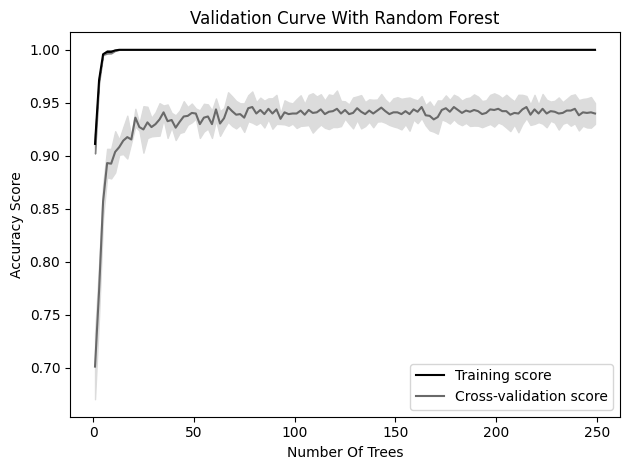

In [ ]:
#Loadlibraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
# Classifier
RandomForestClassifier(),
# Feature matrix
features,
# Target vector
target,
# Hyperparameter to examine
param_name="n_estimators",
# Range of hyperparameter's values
param_range=param_range,
# Number of folds
cv=3,
# Performance metric
scoring="accuracy",
# Use all computer cores
n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score",
color="dimgrey")
# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# **Chapter 12. Model Selection**

##1. Selecting the best model hyperparams using GridSearchCV


In [ ]:
#Using GridSearch
import numpy as np
from sklearn import linear_model,datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
#Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target


In [ ]:
#Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=500,solver="liblinear")

#Create a range of candidate penalthy hyperparameter values
penalty = ["l1","l2"]


#Create a range of candidate regularization hyperparameter values
C = np.logspace(0,4,10)

#Create dictionary of hyperparams candidates
hyperparams = dict(C=C,penalty=penalty)

#Create grid search
gridsearch = GridSearchCV(logistic,hyperparams,cv=5,verbose=0)

#Fit grid search
best_model = gridsearch.fit(features,target)

#Show the best model
print("Best Penalty:",best_model.best_estimator_.get_params()["penalty"])
print("Best C:",best_model.best_estimator_.get_params()["C"])
print("Best overall estimator:",best_model.best_estimator_)

Best Penalty: l1
Best C: 7.742636826811269
Best overall estimator: LogisticRegression(C=7.742636826811269, max_iter=500, penalty='l1',
                   solver='liblinear')


##2. Selecting the best model hyperparams using RandomizedSearch

In [ ]:
# Load libraries
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=500, solver='liblinear')
# Create range of candidate regularization penalty hyperparameter values
penalty = ['l1', 'l2']
# Create distribution of candidate regularization hyperparameter values
C = uniform(loc=0, scale=4)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create randomized search
randomizedsearch = RandomizedSearchCV(
logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
n_jobs=-1)
# Fit randomized search
best_model = randomizedsearch.fit(features, target)
# Print best model
print(best_model.best_estimator_)

LogisticRegression(C=1.668088018810296, max_iter=500, penalty='l1',
                   solver='liblinear')


## 3.Selecting the Best Models from Multiple Learning Algorithms

In [ ]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# Set random seed
np.random.seed(0)
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{"classifier": [LogisticRegression(max_iter=500,
solver='liblinear')],
"classifier__penalty": ['l1', 'l2'],
"classifier__C": np.logspace(0, 4, 10)},
{"classifier": [RandomForestClassifier()],
"classifier__n_estimators": [10, 100, 1000],
"classifier__max_features": [1, 2, 3]}]


#Create a grid search
gridsearch = GridSearchCV (pipe, search_space, cv=5, verbose=0)
#fit grid search
best_model = gridsearch.fit(features, target)
#Print best model
print(best_model.best_estimator_)

Pipeline(steps=[('classifier',
                 LogisticRegression(C=7.742636826811269, max_iter=500,
                                    penalty='l1', solver='liblinear'))])


In [ ]:
#Adding a preprocessing pipeline

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Create a preprocessing object that includes StandardScaler features and PCA
preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])
# Create a pipeline
pipe = Pipeline([("preprocess", preprocess),
("classifier", LogisticRegression(max_iter=1000,
solver='liblinear'))])
# Create space of candidate values
search_space = [{"preprocess__pca__n_components": [1, 2, 3],
"classifier__penalty": ["l1", "l2"],
"classifier__C": np.logspace(0, 4, 10)}]
# Create grid search
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1)
# Fit grid search
best_model = clf.fit(features, target)
# Print best model
print(best_model.best_estimator_)

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=1))])),
                ('classifier',
                 LogisticRegression(C=7.742636826811269, max_iter=1000,
                                    penalty='l1', solver='liblinear'))])


In [ ]:
#Using a specific algorithm method
from sklearn import linear_model,datasets

#load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

#Create a cross validates logistic regression
logit = linear_model.LogisticRegressionCV(Cs = 100, max_iter=500,solver="liblinear")

#Train model
logit.fit(features,target)

print(logit)

LogisticRegressionCV(Cs=100, max_iter=500, solver='liblinear')


# **Chapter 13. Linear Regression**

## 1. Fitting a regression line

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [ ]:
#Generate features matrix, target vector
features, target = make_regression(
    n_samples = 1000,
    n_features = 7,
    n_informative = 6,
    n_targets = 1,
    noise = 0.2,
    coef = False,
    random_state = 1
)

In [ ]:
#Create a linear regression
regression = LinearRegression()

In [ ]:
#fit the linear regression
model = regression.fit(features,target)

In [ ]:
print(model.intercept_)
print(model.coef_)
print(target[0])
print(model.predict(features)[0])
print(model.score(features,target))

-0.0030321450763704794
[-2.03815078e-03  9.04482274e+01  2.60883073e+00  1.64429287e+01
  5.07913810e+01  3.64338737e+00  1.39115841e+01]
-9.074376643308812
-8.98486855840982
0.9999965297399261


## 2. Handling Interactive Effects

In [ ]:
#You have a feature whose effect on the target variable depends on another feature.
#Create an interaction term to capture that dependence using scikit-learn’s
from sklearn.preprocessing import PolynomialFeatures
features, target = make_regression( n_samples = 100,
                                   n_features = 2,
                                    n_targets = 1,
                                    noise = 0.2,
                                    coef = False,
                                    random_state = 1)

#Create interaction term
interaction = PolynomialFeatures(
    degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)



#Create linear regression
regression = LinearRegression()
#Fit the linear regression
model = regression.fit(features_interaction, target)
features_interaction[0]


array([0.0465673 , 0.80186103, 0.0373405 ])

## 3. Fitting a non linear relationship

In [ ]:
# Load library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
n_features = 3,
n_informative = 2,
n_targets = 1,
noise = 0.2,
coef = False,
random_state = 1)
# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_polynomial, target)


# **Chapter 14. Trees and Forests**#

##1. Training a Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

#model
model = dt.fit(features,target)
# Make new observation
observation = [[ 5, 4, 3, 2]]
model.predict(observation)

array([1])

##2. Training a decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

#load data with only two features
diabetes = datasets.load_diabetes()
features = diabetes.data
target = diabetes.target

#Create a decision tree regressor object
decisiontree = DecisionTreeRegressor(random_state=0)

#Train model
model = decisiontree.fit(features,target)
model.predict(features[0].reshape(1,-1))

array([151.])

Just like with DecisionTreeClassifier we can use the ***criterion parameter*** to select
the desired measurement of split quality. For example, we can construct a tree whose splits
reduce mean absolute error (MAE):

In [ ]:
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error",
random_state=0)
# Train model
model_mae = decisiontree_mae.fit(features, target)
model_mae.predict(features[0].reshape(1, -1))

array([151.])

##3. Visualizing a Decision Tree Model

Export the decision tree model into DOT format, then visualize:

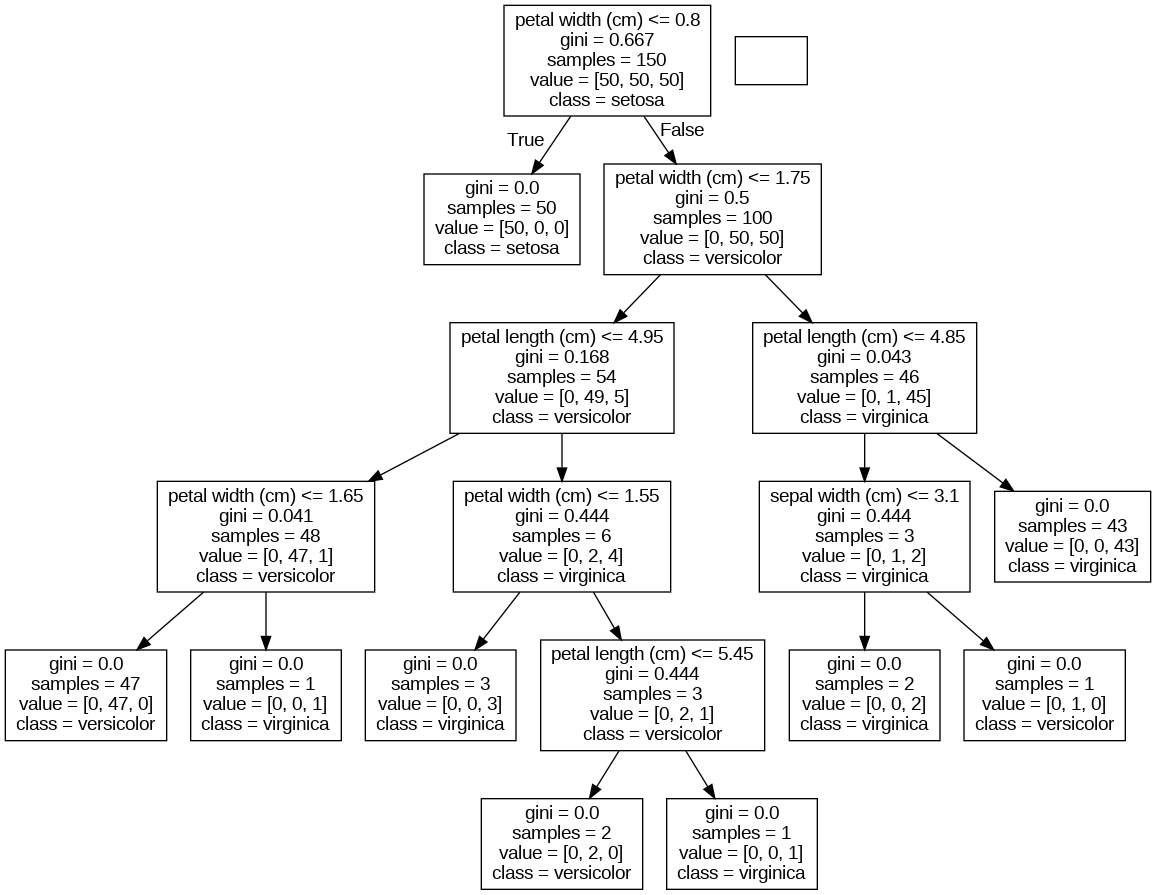

In [ ]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree


#load_data
iris = datasets.load_iris()
features = iris.data
target = iris.target

#create a decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

#Train model
model = decisiontree.fit(features,target)

#create DOT data
dot_data = tree.export_graphviz(decisiontree,
out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png())


In [ ]:
graph.write_pdf("iris.pdf")


True

##4. Evaluating Random Forests with Out-of-Bag Errors

Evaluate a random forest model without using cross-validation.

In [ ]:
#load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

#load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

#Create random forest classifier object
randomforest = RandomForestClassifier(
    random_state=0, n_estimators=1000, oob_score=True,n_jobs=-1)

#Train model
model = randomforest.fit(features,target)

#Evaluate the out-of-bag score
model.oob_score_


0.9533333333333334

##5. Identifying Important Features in Random Forests

Calculate and visualize the importance of each feature by inspecting the model’s
feature_importances_ attribute:

In [ ]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features= iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# Calculate feature importances
importances = model.feature_importances_
importances

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

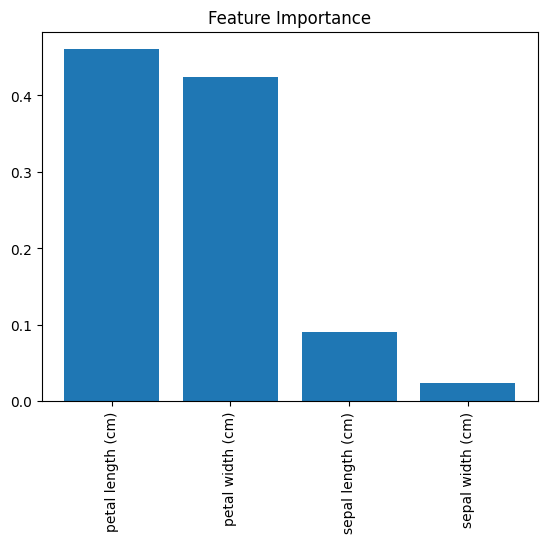

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
# Show plot
plt.show()

Selecting important features

In [ ]:
from sklearn.feature_selection import SelectFromModel
# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)
# Create new feature matrix using selector
features_important = selector.fit_transform(features, target)
# Train random forest using most important features
model = randomforest.fit(features_important, target)
selector.get_support()


array([False, False,  True,  True])

We must note two caveats to this approach. First, nominal categorical features that have been
one-hot encoded will see the feature importance diluted across the binary features. Second, the
feature importance of highly correlated features will be effectively assigned to one feature and
not evenly distributed across both features.

##6. Selecting Important Features in Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

In [ ]:
#Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [ ]:
#Create random forest
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

#Object that selects
selector = SelectFromModel(rf, threshold=0.3)

#New feature matrix
features_important = selector.fit_transform(features,target)

#train random forest using important features
model = rf.fit(features_important,target)

##7. Handling Imbalanced Classes

Train a decision tree or random forest model with class_weight="balanced":

In [ ]:
import numpy as np
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Create random forest classifier object
randomforest = RandomForestClassifier(
random_state=0, n_jobs=-1, class_weight="balanced")
# Train model
model = randomforest.fit(features, target)

##8. Training an Adaboost, XGboost Model and LightGBM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0,learning_rate=0.1)
model = ada.fit(features,target)



In scikit-learn, we can implement AdaBoost using
AdaBoostClassifier or AdaBoostRegressor. The most important parameters are
base_estimator, n_estimators, learning_rate, and loss:
1
n
base_estimator
base_estimator is the learning algorithm to use to train the weak models. The most
common learner to use with AdaBoost is a decision tree, the parameter’s default argument.
n_estimators
n_estimators is the number of models to iteratively train.
learning_rate
learning_rate is the contribution of each model to the weights, and it defaults to 1.
Reducing the learning rate will mean the weights will be increased or decreased to a small
degree, forcing the model to train slower (but sometimes resulting in better performance
scores).
loss
loss is exclusive to AdaBoostRegressor and sets the loss function to use when
updating weights. This defaults to a linear loss function but can be changed to square or
exponential.

In [ ]:
import xgboost as xgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax

# Create dataset
xgb_train = xgb.DMatrix(features, label=target)
# Define parameters
param = {
'objective': 'multi:softprob',
'num_class': 3
}
# Train model
gbm = xgb.train(param, xgb_train)
# Get predictions
predictions = argmax(gbm.predict(xgb_train), axis=1)
# Get a classification report
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        70

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [ ]:
# Load libraries
import lightgbm as lgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create dataset
lgb_train = lgb.Dataset(features, target)
# Define parameters
params = {
'objective': 'multiclass',
'num_class': 3,
'verbose': -1,
}
# Train model
gbm = lgb.train(params, lgb_train)
# Get predictions
predictions = argmax(gbm.predict(features), axis=1)
# Get a classification report
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# **Chapter 15. K Nearest Neighbours**#

##1. Introduction


In [ ]:
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


#load data
iris = datasets.load_iris()
features = iris.data

#Create a standardizer and standardize features
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

#two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

#Create an observations
new_observation = [1, 1, 1, 1]

#Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])

#View the nearest neighbors
features_standardized[indices]



array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [ ]:
# Find two nearest neighbors based on Euclidean distance
nearestneighbors_euclidean = NearestNeighbors(
n_neighbors=2, metric='euclidean').fit(features_standardized)

# View distances
distances

array([[0.49140089, 0.74294782]])

In [ ]:
# List of lists indicating each observation's three nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(
features_standardized).toarray()

# Remove 1s marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
  x[i] = 0


# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

# View first observation's two

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Problem**

Given an observation of unknown class, you need to predict its class based on the class of its
neighbors.

In [ ]:
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
X_std = standardizer.fit_transform(X)

# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
[ 1, 1, 1, 1]]
# Predict the class of two observations
knn.predict(new_observations)

array([1, 2])

In [ ]:
# View probability that each observation is one of three classes
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

##2. Identifying the Best Neighborhood Size

Use model selection techniques like GridSearchCV to find the best value for K

In [ ]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create standardizer
standardizer = StandardScaler()
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

#Create a pipeline
pipe = Pipeline([("standardizer",standardizer),("knn",knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]


#create a grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(features, target)

# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

##3. Creating a Radius-Based Nearest Neighbors Classifier

Given an observation of unknown class, you need to predict its class based on the class of all
observations within a certain distance.

In [ ]:
# Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(
radius=.5, n_jobs=-1).fit(features_standardized, target)
# Create two observations
new_observations = [[ 1, 1, 1, 1]]
rnn.predict(new_observations)

array([2])

##4. Finding Approximate Nearest Neighbors

In [ ]:
import faiss
import numpy as np
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Set faiss parameters
n_features = features_standardized.shape[1]
nlist = 3
k = 2
# Create an IVF index
quantizer = faiss.IndexFlatIP(n_features)
index = faiss.IndexIVFFlat(quantizer, n_features, nlist)
# Train the index and add feature vectors
index.train(features_standardized)
index.add(features_standardized)
# Create an observation
new_observation = np.array([[ 1, 1, 1, 1]])
# Search the index for the 2 nearest neighbors
distances, indices = index.search(new_observation, k)
# Show the feature vectors for the two nearest neighbors
np.array([list(features_standardized[i]) for i in indices[0]])

array([[1.03800476, 0.55861082, 1.10378283, 1.18556721],
       [0.79566902, 0.32841405, 0.76275827, 1.05393502]])

Compute the recall @k nearest neighbors of the ANN as compared to the KNN

In [ ]:
# Load libraries
import faiss
import numpy as np
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Number of nearest neighbors
k = 10
# Load data
iris = datasets.load_iris()
features = iris.data
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Create KNN with 10 NN
nearest_neighbors = NearestNeighbors(n_neighbors=k).fit(features_standardized)
# Set faiss parameters
n_features = features_standardized.shape[1]
nlist = 3
# Create an IVF index
quantizer = faiss.IndexFlatIP(n_features)
index = faiss.IndexIVFFlat(quantizer, n_features, nlist)
# Train the index and add feature vectors
index.train(features_standardized)
index.add(features_standardized)

index.nprobe = 1
# Create an observation
new_observation = np.array([[ 1, 1, 1, 1]])
# Find distances and indices of the observation's exact nearest neighbors
knn_distances, knn_indices = nearest_neighbors.kneighbors(new_observation)
# Search the index for the two nearest neighbors
ivf_distances, ivf_indices = index.search(new_observation, k)
# Get the set overlap
recalled_items = set(list(knn_indices[0])) & set(list(ivf_indices[0]))
# Print the recall
print(f"Recall @k={k}: {len(recalled_items)/k * 100}%")

Recall @k=10: 100.0%


# **Chapter 16. Logistic Regression**#

##1.Training a binary classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

#Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)

#train a model
model = logistic_regression.fit(features_standardized, target)


In [ ]:
new_observation = [[.5, .5, .5, .5]]
# Predict class
model.predict(new_observation)


array([1])

In [ ]:
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.17740549, 0.82259451]])

##2. Training a multiclass classifier

In [ ]:
multiclass_logistic_regression = LogisticRegression(random_state=0,multi_class="multinomial")

## Train model
model = multiclass_logistic_regression.fit(features_standardized, target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
new_observation = [[.5, .5, .5, .5]]
# Predict class
model.predict(new_observation)

array([1])

In [ ]:
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.14355046, 0.85644954]])

##3.Reducing Variance Through Regularization

We are going to create a base model and one with hyperparam tuning

In [ ]:
# Load libraries
from sklearn.linear_model import LogisticRegressionCV

#Create logistic regression object
base_linear = LogisticRegression(random_state=0)

#Create a decision tree hyperparam tuned
param_linear = LogisticRegressionCV(
penalty='l2', Cs=10, random_state=0, n_jobs=-1)

#Train model base
base_linear.fit(features_standardized, target)

#Train model hyperparam tuned
param_linear.fit(features_standardized, target)



LogisticRegressionCV(n_jobs=-1, random_state=0)

In [ ]:
new_observation = [[.5, .5, .5, .5]]
# Predict class
base_linear.predict(new_observation)
param_linear.predict(new_observation)

array([1])

In [ ]:
# View predicted probabilities
print(base_linear.predict_proba(new_observation))
# View predicted probabilities
print(param_linear.predict_proba(new_observation))

[[0.17740549 0.82259451]]
[[0.49877979 0.50122021]]


# **Chapter 17. Support Vector Machines**#

##1. Training a Linear Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

#load data w only two classes
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

#standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

#Create support vector classifier
svc = LinearSVC(C=1.0)

#Train model
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[ -2, 3]]

svc.predict(new_observation)


array([0])

Visualizing the separation

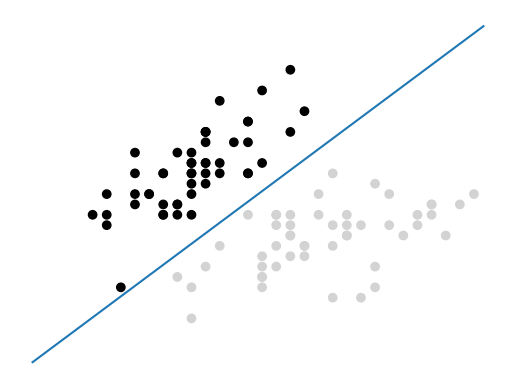

In [ ]:


# Load library
from matplotlib import pyplot as plt
# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [ ]:
from sklearn.svm import SVC


# Set randomization seed
np.random.seed(0)
# Generate two features
features = np.random.randn(200, 2)
# Use an XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

# Create new observation
new_observation = [[ -2, 3]]

svc.predict(new_observation)



array([0])

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier):
  cmap = ListedColormap(['r', 'b'])  # Use color values instead of names
  xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),  # Use cmap to get color values
      marker="+", label=cl)

In [ ]:
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Train model
svc_linear.fit(features, target)

SVC(C=1, kernel='linear', random_state=0)

<ipython-input-15-60f760a7e23d>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


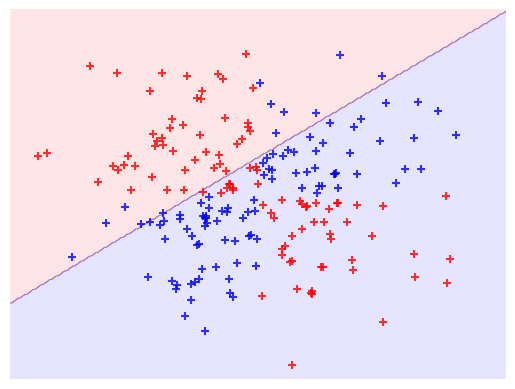

In [ ]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

In [ ]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

<ipython-input-15-60f760a7e23d>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


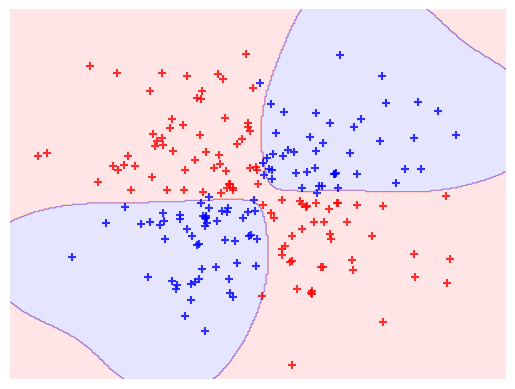

In [ ]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

In [ ]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# Create new observation
new_observation = [[.4, .4, .4, .4]]
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

In [ ]:
# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [ ]:
#Finding support indices
model.support_


array([23, 41, 57, 98], dtype=int32)

In [ ]:
#Number of support vectors
model.n_support_

array([2, 2], dtype=int32)

# **Chapter 18. Naive Bayes**#

##1. Training a Classifier for Continuous Features

In [ ]:
#load libraries
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#load data
iris = datasets.load_iris()
features = iris.data
target = iris.target


#Create a Naive Bayes object
classifier = GaussianNB()

#Train a model
model = classifier.fit(features,target)


# Create new observation
new_observation = [[ 2.6, 2.6, 2.6, 0.4]]

model.predict_proba(new_observation)


array([[2.31548432e-04, 9.99768128e-01, 3.23532277e-07]])

##2. Calibrating Predicted Probabilities

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
# Create calibrated cross-validation with sigmoid calibration


classifer_sigmoid = CalibratedClassifierCV(classifier, cv=2, method='sigmoid')
# Calibrate probabilities
classifer_sigmoid.fit(features, target)


# View calibrated probabilities
classifer_sigmoid.predict_proba(new_observation)


array([[0.31859971, 0.63663451, 0.04476578]])

##3. Training a Classifier for Discrete and Count Features

In [ ]:
# Load libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
# Create text
text_data = np.array(['I love Brazil. Brazil!',
'Brazil is best',
'Germany beats both'])
# Create bag of words
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)
# Create feature matrix
features = bag_of_words.toarray()
# Create target vector
target = np.array([0,0,1])
# Create multinomial naive Bayes object with prior probabilities of each class
classifer = MultinomialNB(class_prior=[0.25, 0.5])
# Train model
model = classifer.fit(features, target)

# Create new observation
new_observation = [[0, 0, 0, 1, 0, 1, 0]]
# Predict new observation's class
model.predict(new_observation)

array([0])

If class_prior is not specified, prior probabilities are learned using the data. However, if we
want a uniform distribution to be used as the prior, we can set fit_prior=False.

#**Chapter 19: Clustering**

In [ ]:
#Setting up all the libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,MiniBatchKMeans,MeanShift,DBSCAN,AgglomerativeClustering


In [ ]:
# Setting up the data
iris = datasets.load_iris()
features = iris.data
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)


In [ ]:
#Normal KMeans
cluster = KMeans(n_clusters=3, random_state=0)
# Train model
model = cluster.fit(features_std)
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]
# Predict observation's cluster
model.predict(new_observation)

array([2], dtype=int32)

In [ ]:
# Create k-mean object
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100,
n_init="auto")
# Train model
model = cluster.fit(features_std)
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]
# Predict observation's cluster
model.predict(new_observation)

array([2], dtype=int32)

In [ ]:
# Create mean shift object
cluster = MeanShift(n_jobs=-1)

# Train model
model = cluster.fit(features_std)
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]
# Predict observation's cluster
model.predict(new_observation)

array([0])

In [ ]:
# Create agglomerative clustering object
cluster = AgglomerativeClustering(n_clusters=3)

# Train model
model = cluster.fit(features_std)
# Create new observation
new_observation = [[0.8, 0.8, 0.8, 0.8]]
# Predict observation's cluster
labels = model.labels_
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#**Chapter 20: Tensors with Pytorch**

##1. Creating a tensor , tensor from array and a sparse tensor


In [ ]:
import torch
import numpy as np

#Create a vector as a row
tensor_row = torch.tensor([1,2,3])

#Create a vector as a column
tensor_column = torch.tensor([[1],[2],[3]])

#Create a matrix
tensor = torch.tensor([[1,2],[3,4]])

#Create a sparse tensor
sparse_tensor = torch.tensor(
[ [
0, 0],
[0, 1],
[3, 0]
])

#Create a numpy array
vector_row =np.array([1,2,3])


print(tensor_row)
print(tensor_column)
print(tensor)
print(sparse_tensor)



tensor([1, 2, 3])
tensor([[1],
        [2],
        [3]])
tensor([[1, 2],
        [3, 4]])
tensor([[0, 0],
        [0, 1],
        [3, 0]])


##2. Selecting elements in a tensor

In [ ]:
# Create vector tensor
vector = torch.tensor([1, 2, 3, 4, 5, 6])
# Create matrix tensor
matrix = torch.tensor(
[
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]
]
)
# Select third element of vector
print(vector[2])
# Select second row, second column
matrix[1,1]

tensor(3)


tensor(5)

##3. Transposing a vector


Transposing with PyTorch is slightly different from NumPy. The T method used for NumPy
arrays is supported in PyTorch only with tensors of two dimensions and at the time of writing is
deprecated for tensors of other shapes. The mT method used to transpose batches of tensors is
preferred, as it scales to greater than two dimensions.

In [ ]:
# Load library
import torch
# Create a two-dimensional tensor
tensor = torch.tensor([[[1,2,3]]])
# Transpose it
tensor.mT

tensor([[[1],
         [2],
         [3]]])

#**Chapter 21: Neural Networks**


##1. Using Autograd with PyTorch

In [ ]:
import torch

#create a torch tensor that requires gradients
t = torch.tensor([1.0,2.0,3.0],requires_grad=True)

#Perform a tensor operation simulating "foward prop"
tensor_sum = t.sum()

#Perform back propagation
tensor_sum.backward()

#View the gradient
t.grad

tensor([1., 1., 1.])

Autograd is one of the core features of PyTorch and a big factor in its popularity as a deep
learning library. The ability to easily compute, store, and visualize gradients makes PyTorch very
intuitive for researchers and enthusiasts building neural networks from scratch.
PyTorch uses a directed acyclic graph (DAG) to keep a record of all data and computational
operations being performed on that data. This is incredibly useful, but it also means we need to
be careful with what operations we try to apply on our PyTorch data that requires gradients.
When working with autograd, we can’t easily convert our tensors to NumPy arrays and back
without “breaking the graph,” a phrase used to describe operations that don’t support autograd

In [ ]:
tensor = torch.tensor([1.0,2.0,3.0], requires_grad=True)
tensor.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
tensor.detach().numpy()

array([1., 2., 3.], dtype=float32)

##2. Preprocessing Data for Neural Networks

Typically, a neural network’s parameters are initialized (i.e., created) as
small random numbers. Neural networks often behave poorly when the feature values are much
larger than the parameter values. Furthermore, since an observation’s feature values are
combined as they pass through individual units, it is important that all features have the same
scale.
For these reasons, it is best practice (although not always necessary; for example, when we have
all binary features) to standardize each feature such that the feature’s values have the mean of 0
and the standard deviation of 1. This can be accomplished easily with scikit-learn’s
StandardScaler.


In [ ]:
#load libs
from sklearn import preprocessing
import numpy as np

#create feature
features = np.array([[-100.1, 3240.1],
[-200.2, -234.1],
[5000.5, 150.1],
[6000.6, -125.1],
[9000.9, -673.1]])

#convert to tensor
features_standardized_tensor = torch.from_numpy(features)

features_standardized_tensor


tensor([[-100.1000, 3240.1000],
        [-200.2000, -234.1000],
        [5000.5000,  150.1000],
        [6000.6000, -125.1000],
        [9000.9000, -673.1000]], dtype=torch.float64)

However, if you need to perform this operation after having created tensors with
requires_grad=True, you’ll need to do this natively in PyTorch, so as not to break the
graph. While you’ll typically standardize features prior to starting to train the network, it’s worth
knowing how to accomplish the same thing in PyTorch:

In [ ]:
# Create features
torch_features = torch.tensor([[-100.1, 3240.1],
[-200.2, -234.1],
[5000.5, 150.1],
[6000.6, -125.1],
[9000.9, -673.1]], requires_grad=True)

#compute the mean and sd
mean = torch_features.mean(0,keepdim=True)
standard_deviation = torch_features.std(0,unbiased=False,keepdim=True)

# Standardize the features using the mean and standard deviation
torch_features_standardized = torch_features - mean
torch_features_standardized /= standard_deviation

torch_features_standardized


tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], grad_fn=<DivBackward0>)

##3. Training a Binary Classifier

In both cases, the network itself is a two-layer neural network (when counting layers we don’t
include the input layer because it does not have any parameters to learn) defined using PyTorch’s
sequential model. Each layer is “dense” (also called “fully connected”), meaning that all the units
in the previous layer are connected to all the units in the next layer.
In the first hidden layer we set out_features=16, meaning that layer contains 16 units.
These units have ReLU activation functions as defined in the forward method of our class: x
= nn.functional.relu(self.fc1(x)). The first layer of our network has the size
(10, 16), which tells the first layer to expect each observation from our input data to have 10
feature values. This network is designed for binary classification so the output layer contains
only one unit with a sigmoid activation function, which constrains the output to between 0 and 1
(representing the probability an observation is class 1).

In [ ]:
#Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Create training and test sets
features, target = make_classification (n_classes=2, n_features=10,n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1,random_state=1)

#set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

#Define a neural network using 'Sequential'
class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        torch.nn.Sigmoid()
    )
  def forward(self,x):
    x = self.sequential(x)
    return x


#Initialize neural network
network = SimpleNeuralNet()

#Define loss function and optimizer
loss_function = torch.nn.BCELoss()
optimizer = RMSprop(network.parameters())

#Define data loaders
train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network)

#Train a neural network
epoch = 3
for epoch in range(epoch):
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = loss_function(output,target)
    loss.backward()
    optimizer.step()
  print("Epoch: ",epoch+1, "\tLoss: ",loss.item())

#Evaluate neural network
with torch.no_grad():
  output = network(x_test)
  test_loss = loss_function(output,y_test) # Use loss_function instead of criterion
  test_accuracy = (output.round() == y_test).float().mean()
  print("Test Loss:", test_loss.item(), "\tTest Accuracy:",test_accuracy.item())

Epoch:  1 	Loss:  0.19006992876529694
Epoch:  2 	Loss:  0.14092369377613068
Epoch:  3 	Loss:  0.03935524821281433
Test Loss: 0.06877756863832474 	Test Accuracy: 0.9700000286102295


##4. Training a multiclass classification

In this solution we created a similar neural network to the binary classifier from the last recipe,
but with some notable changes. In the classification data we generated, we set N_CLASSES=3.
To handle multiclass classification, we also use nn.CrossEntropyLoss(), which expects
the target to be one-hot encoded. To accomplish this, we use the
torch.nn.functional.one_hot function and end up with a one-hot encoded array
where the position of 1. indicates the class for a given observation:

y_train
tensor([[1., 0., 0.],
[0., 1., 0.],
[1., 0., 0.],
...,
[0., 1., 0.],
[1., 0., 0.],
[0., 0., 1.]])



Since this is a multiclass classification problem, we used an output layer of size 3 (one per class)
containing a softmax activation function. The softmax activation function will return an array of
3 values summing to 1. These 3 values represent an observation’s probability of being a member
of each of the 3 classes.
As mentioned in this recipe, we used a loss function suited to multiclass classification, the
categorical cross-entropy loss function: nn.CrossEntropyLoss().

In [ ]:
#Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

N_CLASSES=3
EPOCHS=3


# Create training and test sets
features, target = make_classification(n_classes=N_CLASSES, n_informative=9,
n_redundant=0, n_features=10, n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

#set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(target_train).long(),
num_classes=N_CLASSES).float()
x_test = torch.from_numpy(features_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(target_test).long(),
num_classes=N_CLASSES).float()

#Define a neural network using 'Sequential'
class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,3),
        torch.nn.Softmax()
    )
  def forward(self,x):
    x = self.sequential(x)
    return x


# Initialize neural network
network = SimpleNeuralNet()
# Define loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
# Compile the model using torch 2.0's optimizer
network = torch.compile(network)


# Train neural network
for epoch in range(EPOCHS):
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target) # Use loss_function instead of criterion
    loss.backward()
    optimizer.step()
  print("Epoch: ",epoch+1, "\tLoss: ",loss.item())

#Evaluate neural network
with torch.no_grad():
  output = network(x_test)
  test_loss = loss_function(output,y_test) # Use loss_function instead of criterion
  test_accuracy = (output.round() == y_test).float().mean()
  print("Test Loss:", test_loss.item(), "\tTest Accuracy:",test_accuracy.item())


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/utils.py:1574: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return fn()
/usr/local/lib/python3.10/dist-packages/torch/fx/experimental/symbolic_shapes.py:5498: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = super().run_node(n)
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2134: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(


Epoch:  1 	Loss:  0.8022041916847229
Epoch:  2 	Loss:  0.7756164073944092
Epoch:  3 	Loss:  0.7751263380050659


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/utils.py:1574: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return fn()
/usr/local/lib/python3.10/dist-packages/torch/fx/experimental/symbolic_shapes.py:5498: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result = super().run_node(n)
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:2134: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return handle_torch_function(


Test Loss: 0.9305145144462585 	Test Accuracy: 0.8199999928474426


##5. Making Predictions

Making predictions is easy in PyTorch. Once we have trained our neural network we can use the
forward method (already used as part of the training process), which takes as input a set of
features and does a forward pass through the network. In our solution the neural network is set
up for binary classification, so the predicted output is the probability of being class 1.
Observations with predicted values very close to 1 are highly likely to be class 1, while
observations with predicted values very close to 0 are highly likely to be class 0. Hence, we use
the round method to convert these values to 1s and 0s for our binary classifier.

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Set random seed
torch.manual_seed(0)
np.random.seed(0)
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)
# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet,self).__init__()
    self.sequential = torch.nn.Sequential(
        torch.nn.Linear(10,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,16),
        torch.nn.ReLU(),
        torch.nn.Linear(16,1),
        torch.nn.Sigmoid()
    )
  def forward(self,x):
    x = self.sequential(x)
    return x
# Initialize neural network
network = SimpleNeuralNet()
# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
# Compile the model using torch 2.0's optimizer
network = torch.compile(network)
# Train neural network
epochs = 3
for epoch in range(epochs):
  for batch_idx,(data,target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()
  print("Epoch: ",epoch+1, "\tLoss: ",loss.item())
# Evaluate neural network
with torch.no_grad():
  predicted_class = network.forward(x_train).round()

predicted_class[0]


Epoch:  1 	Loss:  0.19006992876529694
Epoch:  2 	Loss:  0.14092369377613068
Epoch:  3 	Loss:  0.03935524821281433


tensor([1.])

##6. Visualizing training history

When our neural network is new, it will have poor performance. As the neural network learns on
the training data, the model’s error on both the training and test set will tend to decrease.
However, at a certain point, a neural network can start “memorizing” the training data and
overfit. When this starts happening, the training error may decrease while the test error starts
increasing. Therefore, in many cases, there is a “sweet spot” where the test error (which is the
error we mainly care about) is at its lowest point. This effect can be seen in the solution, where
we visualize the training and test loss at each epoch. Note that the test error is lowest around
epoch 15, after which the training loss plateaus while the test loss starts increasing. From this
point onward, the model is overfitting.

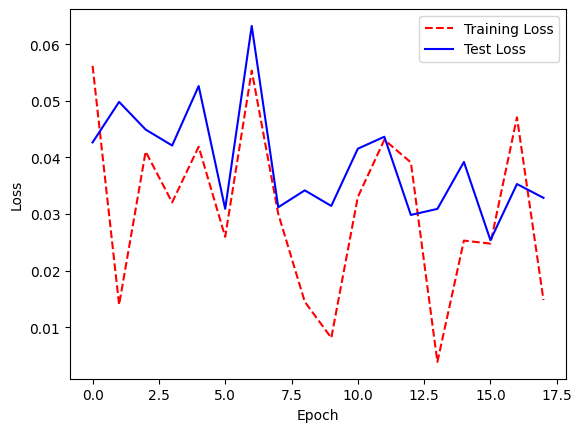

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Train neural network
epochs = 18
train_losses = []
test_losses = []
for epoch in range(epochs):
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
  with torch.no_grad():
    train_output = network(x_train)
    train_loss = criterion(output, target)
    train_losses.append(train_loss.item())
    test_output = network(x_test)
    test_loss = criterion(test_output, y_test)
    test_losses.append(test_loss.item())
# Visualize loss history
epochs = range(0, epochs)
plt.plot(epochs, train_losses, "r--")
plt.plot(epochs, test_losses, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##7. Reducing Overfitting with Early Stopping

Typically in the first several training epochs, both the training
and test errors will decrease, but at some point the network will start “memorizing” the training
data, causing the training error to continue to decrease even while the test error starts increasing.
Because of this phenomenon, one of the most common and very effective methods to counter
overfitting is to monitor the training process and stop training when the test error starts to
increase. This strategy is called early stopping.
In PyTorch, we can implement early stopping as a callback function. Callbacks are functions that
can be applied at certain stages of the training process, such as at the end of each epoch.
However, PyTorch itself does not define an early stopping class for you, so here we use the
popular library lightning (known as PyTorch Lightning) to use an out-of-the-box one.
PyTorch Lightning is a high-level library for PyTorch that provides a lot of useful features. In
our solution, we included PyTorch Lightning’s EarlyStopping(monitor="val_loss",
mode="min", patience=3) to define that we wanted to monitor the test (validation) loss
at each epoch, and if the test loss has not improved after three epochs (the default), training is
interrupted.
If we did not include the EarlyStopping callback, the model would train for the full 1,000
max epochs without stopping on its own:

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
import lightning as pl
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Set random seed
torch.manual_seed(0)
np.random.seed(0)
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)


# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet, self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10, 16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16, 1),
      #torch.nn.Dropout(0.1), # Drop 10% of neurons
      torch.nn.Sigmoid()
)
  def forward(self, x):
    x = self.sequential(x)
    return x
class LightningNetwork(pl.LightningModule):
  def __init__(self, network):
    super().__init__()
    self.network = network
    self.criterion = nn.BCELoss()
    self.metric = nn.functional.binary_cross_entropy
  def training_step(self, batch, batch_idx):
    # training_step defines the train loop.
    data, target = batch
    output = self.network(data)
    loss = self.criterion(output, target)
    self.log("val_loss", loss)
    return loss
  def configure_optimizers(self):
    optimizer = RMSprop(self.network.parameters())
    return optimizer


# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
# Initialize neural network
network = LightningNetwork(SimpleNeuralNet())
# Train network
trainer = pl.Trainer(callbacks=[EarlyStopping(monitor="val_loss", mode="min",
patience=3)], max_epochs=1000)
trainer.fit(model=network, train_dataloaders=train_loader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type            | Params | Mode 
------------------------------------------------------
0 | network   | SimpleNeuralNet | 465    | train
1 | criterion | BCELoss         | 0      | train
------------------------------------------------------
465       Trainable params
0         Non-trainable params
465       Total params
0.002     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type            | Params | Mode 
------------------------------------------------------
0 | network   | Simple

Training: |          | 0/? [00:00<?, ?it/s]

##8. Saving the models progress

In the real world, it is common for neural networks to train for hours or even days. During that
time a lot can go wrong: computers can lose power, servers can crash, or inconsiderate graduate
students can close your laptop.
We can use torch.save to alleviate this problem by saving the model after every epoch.
Specifically, after every epoch, we save a model to the location model.pt, the second
argument to the torch.save function. If we include only a filename (e.g., model.pt) that file
will be overridden with the latest model every epoch.
As you can imagine, we can introduce additional logic to save the model every few epochs, only
save a model if the loss goes down, etc. We could even combine this approach with the early
stopping approach in PyTorch Lightning to ensure we save a model no matter at what epoch the
training ends.

In [ ]:

import torch
import torch.nn as nn
from torchviz import make_dot
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Create training and test sets
features, target = make_classification(n_classes=2, n_features=10,
n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Set random seed
torch.manual_seed(0)
np.random.seed(0)
# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
  def __init__(self):
    super(SimpleNeuralNet, self).__init__()
    self.sequential = torch.nn.Sequential(
      torch.nn.Linear(10, 16),
      torch.nn.ReLU(),
      torch.nn.Linear(16,16),
      torch.nn.ReLU(),
      torch.nn.Linear(16, 1),
      torch.nn.Dropout(0.1), # Drop 10% of neurons
      torch.nn.Sigmoid(),
    )
  def forward(self, x):
    x = self.sequential(x)
    return x

# Initialize neural network
network = SimpleNeuralNet()
# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())
# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
# Compile the model using torch 2.0's optimizer
network = torch.compile(network)


# Train neural network
epochs = 5
for epoch in range(epochs):
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    # Save the model at the end of every epoch
    torch.save(
{
      'epoch': epoch,
      'model_state_dict': network.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'loss': loss,
},
"model.pt"
)
    make_dot(output.detach(), params=dict(
      list(
        network.named_parameters()
          )
        )
      ).render(
          "simple_neural_network",
          format="png"
)
  print("Epoch:", epoch+1, "\tLoss:", loss.item())

Epoch: 1 	Loss: 0.13303154706954956
Epoch: 2 	Loss: 0.15853148698806763
Epoch: 3 	Loss: 0.09414386749267578
Epoch: 4 	Loss: 0.1267329305410385
Epoch: 5 	Loss: 0.11501558125019073


#**Chapter 22. Neural Networks for Unstructured Data**

Convolutional neural networks are typically used for tasks in image recognition and computer
vision. They typically consist of convolutional layers, pooling layers, and a fully connected
layer.
The purpose of the convolutional layers is to learn important image features that can be used for
the task at hand. Convolutional layers work by applying a filter to a particular area of an image
(the size of the convolution). The weights of this layer then learn to recognize specific image
features critical in the classification task. For instance, if we’re training a model that recognizes a
person’s hand, the filter may learn to recognize fingers.
The purpose of the pooling layer is typically to reduce the dimensionality of the inputs from the
previous layer. This layer also uses a filter applied to a portion of the input, but it has no
activation. Instead, it reduces dimensionality of the input by performing max pooling (where it
selects the pixel in the filter with the highest value) or average pooling (where it takes an average
of the input pixels to use instead).
Finally, the fully connected layer can be used with something like a softmax activation function
to create a binary classification task.

In [ ]:
#import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms


In [ ]:
# Define the convolutional neural network architecture
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(64 * 14 * 14, 128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    x = nn.functional.relu(self.conv1(x))
    x = nn.functional.relu(self.conv2(x))
    x = nn.functional.max_pool2d(self.dropout1(x), 2)
    x = torch.flatten(x, 1)
    x = nn.functional.relu(self.fc1(self.dropout2(x)))
    x = self.fc2(x)
    return nn.functional.log_softmax(x, dim=1)

#Set the device to run on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Define the data processing steps
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

#Load the MNIST
train_dataset = datasets.MNIST('./data', train=True, download=True,
transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
shuffle=True)

# Initialize the model and optimizer
model = Net().to(device)
optimizer = optim.Adam(model.parameters())

# Compile the model using torch 2.0's optimizer
model = torch.compile(model)

# Define the training loop
model.train()
for batch_idx, (data, target) in enumerate(train_loader):
  data, target = data.to(device), target.to(device)
  optimizer.zero_grad()
  output = model(data)
  loss = nn.functional.nll_loss(output, target)
  loss.backward()
  optimizer.step()


# Define the testing loop
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    # get the index of the max log-probability
    test_loss += nn.functional.nll_loss(
      output, target, reduction='sum'
    ).item() # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()


test_loss /= len(test_loader.dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 315kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.89MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.39MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/funct

#**Chapter 23. Saving, Loading, and Serving Trained Models**

In [ ]:
#Load libraries
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifer object
classifer = RandomForestClassifier()
# Train model
model = classifer.fit(features, target)

#save model as pickle file
joblib.dump(model, "model.pkl")

/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.10/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


['model.pkl']

In [ ]:
#Load model from file
cls = joblib.load("model.pkl")
# Create new observation
new_observation = [[5.2, 3.2, 1.1, 0.1]]
# Predict observation's class
cls.predict(new_observation)

array([0])

When saving scikit-learn models, be aware that saved models might not be compatible between
versions of scikit-learn; therefore, it can be helpful to include the version of scikit-learn used in
the model in the filename:

In [ ]:
# Import library
import sklearn
# Get scikit-learn version
scikit_version = sklearn.__version__
# Save model as pickle file
joblib.dump(model, "model_{version}.pkl".format(version=scikit_version))

['model_1.6.0.pkl']

##1. Saving a tensorflow model

In [ ]:
# Load libraries
import numpy as np
from tensorflow import keras
# Set random seed
np.random.seed(0)
# Create model with one hidden layer
input_layer = keras.Input(shape=(10,))
hidden_layer = keras.layers.Dense(10)(input_layer)
output_layer = keras.layers.Dense(1)(input_layer)
model = keras.Model(input_layer, output_layer)
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model
x_train = np.random.random((1000, 10))
y_train = np.random.random((1000, 1))
model.fit(x_train, y_train)
# Save the model to a directory called `save_model`
model.save("save_model.keras")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2566   


##2. Serving Scikit-learn models

In [ ]:
#Build a Python Flask application that loads the model trained earlier in this chapter:
# Import libraries
import joblib
from flask import Flask, request


# Instantiate a flask app
app = Flask(__name__)
# Load the model from disk
model = joblib.load("model.pkl")
# Create a predict route that takes JSON data, makes predictions, and
# returns them
@app.route("/predict", methods = ["POST"])
def predict():
    print(request.json)
    inputs = request.json["inputs"]
    prediction = model.predict(inputs)
    return {
    "prediction" : prediction.tolist()
    }
# Run the app
if __name__ == "__main__":
  app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
